In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

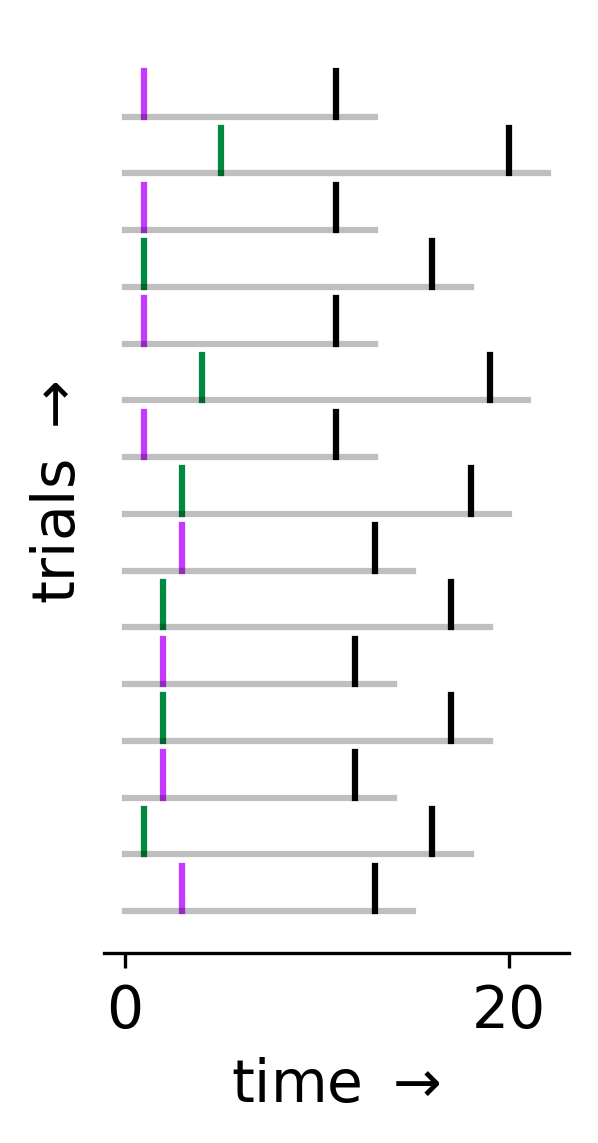

In [3]:
#%% create experiment

E = PavlovTiming(ncues=2)
plot_trials(E.trials[:15])

In [4]:
#%% create model

hidden_size = 2 # number of hidden neurons
gamma = 0.5 # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
            hidden_size=hidden_size, gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 56


Epoch 0, 0.0545
Epoch 10, 0.0355
Epoch 20, 0.0273
Epoch 30, 0.0235
Epoch 40, 0.0213
Epoch 50, 0.0194
Epoch 60, 0.0179
Epoch 70, 0.0165
Epoch 80, 0.0118
Epoch 90, 0.0072
Epoch 100, 0.0063
Epoch 110, 0.0441
Epoch 120, 0.0088
Epoch 130, 0.0049
Epoch 140, 0.0045
Epoch 150, 0.0041
Epoch 160, 0.0037
Epoch 170, 0.0034
Epoch 180, 0.0032
Epoch 190, 0.0030
Epoch 200, 0.0028
Epoch 210, 0.0027
Epoch 220, 0.0040
Epoch 230, 0.0017
Stopping.
Done! Best loss: 0.0017243877260221376


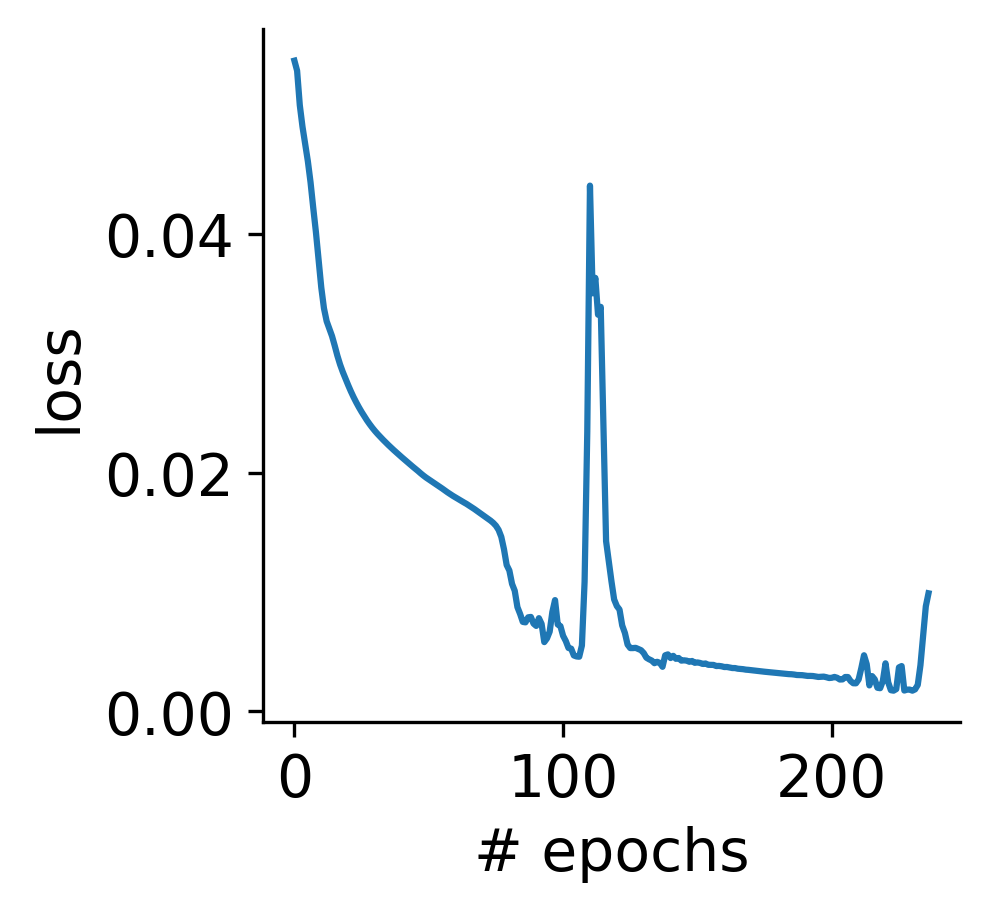

In [5]:
#%% train model

lr = 0.003
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr)
plot_loss(scores)

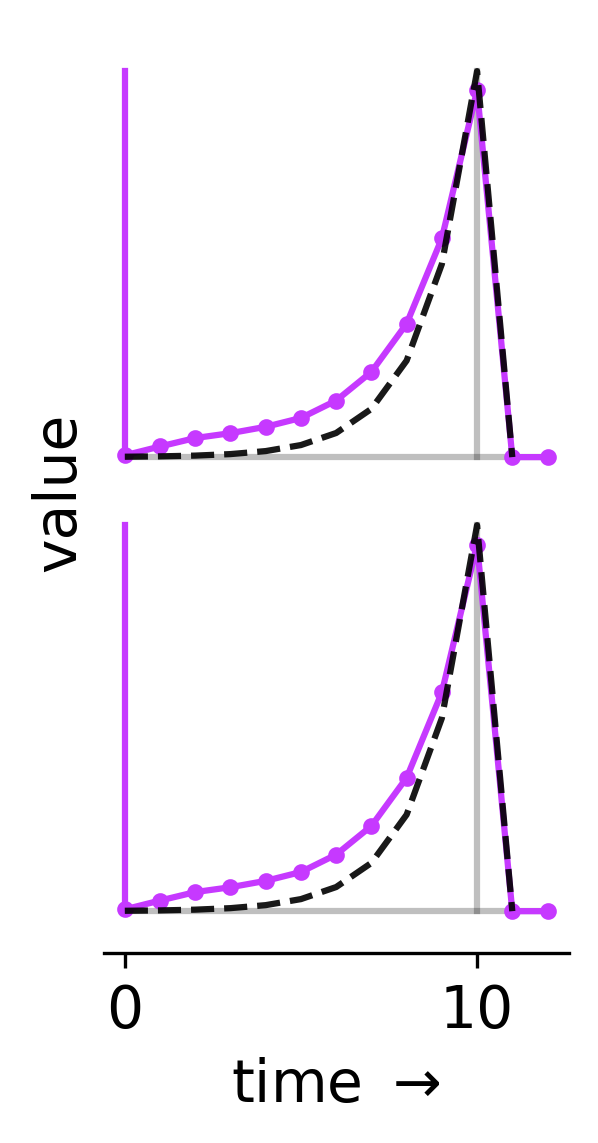

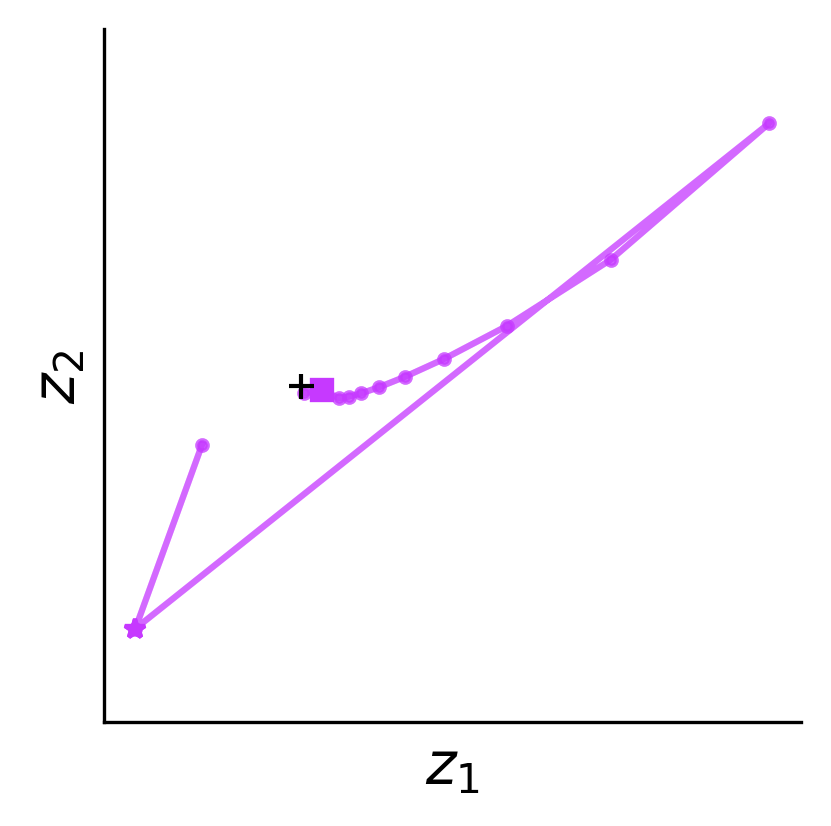

In [6]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])